In [73]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Профіль колонок набору даних:

- **datetime**: дата та час зібрані погодинно
- **season**: сезон (1: весна, 2: літо, 3: осінь, 4: зима)
- **holiday**: чи є день святковим (витягнуто з http://dchr.dc.gov/page/holiday-schedule)
- **workingday**: якщо день не є вихідним або святковим, то позначається як 1, в іншому випадку – 0.
- **weather**:
  1. Ясно, Мало хмарно, частково хмарно
  2. Туман + Хмарно, Туман + Розірвані хмари, Туман + Мало хмарно, Туман
  3. Легкий сніг, Легкий дощ + Гроза + Розсіяні хмари, Легкий дощ + Розсіяні хмари
  4. Сильний дощ + Крижані кулі + Гроза + Туман, Сніг + Туман
- **temp**: температура в градусах Цельсія
- **atemp**: як відчувається температура в градусах Цельсія
- **humidity**: вологість
- **windspeed**: швидкість вітру
- **casual**: кількість неформальних користувачів
- **registered**: кількість зареєстрованих користувачів
- **count**: загальна кількість велосипедів, взятих в оренду, включаючи неформальних та зареєстрованих користувачів


In [74]:
df = pd.read_csv('./data/yulu_rental.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


1. Кількість велосипедів взятих в оренду за погодними умовами. 

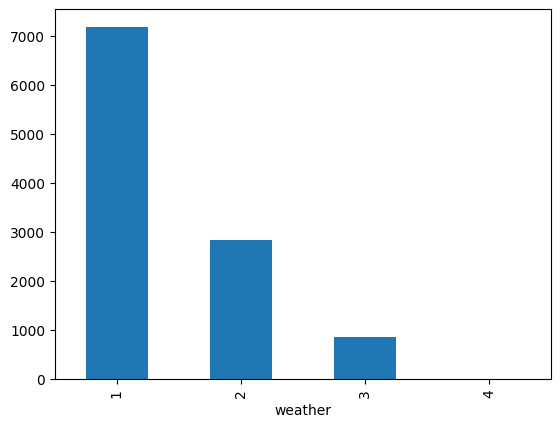

In [75]:
grouped_df = df.groupby(by='weather').count()

grouped_df['count'].plot.bar();

Висновки: за результатми отриманого графіку можна зробити висновок, що кількість взятих в оренду велосипедів має пряму залежність від погодних умов: чим краща погода, тим більше орендаваних велосипедів. 
Тож, відслідковуючи прогноз погоди, можемо пропонувати акції нашим користувачам з метою збільшення попиту у дні, коли прогнозується гарна погода.

2. Який попит на велосипеди погодинно?

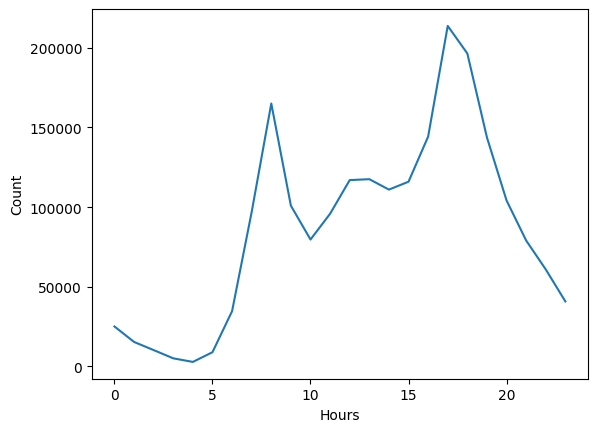

In [76]:
df['datetime'] = pd.to_datetime(df.datetime)
df['hour'] = df['datetime'].dt.hour

filtered_df = df[['count', 'hour']].groupby(by='hour').sum()

plt.plot(filtered_df)
plt.xlabel('Hours')
plt.ylabel('Count');

Висновки: найбільший попит на оренду велосипедів спостерігається в ранкові години (приблизно 7-9 ранку) та у післяобідній час (16-18).  
Це може говорити про те, що основною категорією користувачів є праюючі люди і вони використовують наші велосипеди, як транспорт, щоб дістатися роботи.

3. Дослідимо залежність розподілу взятих в оренду велосипедіів, відповідно до типу дня (будні чи святкові).

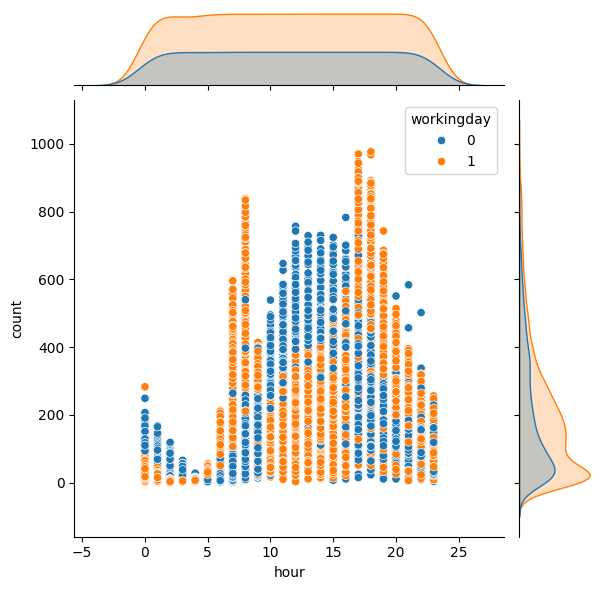

In [77]:
sns.jointplot(data=df, x='hour', y='count', hue='workingday');

Висновки: за допомогою даного графіку підтверджується гіпотеза зроблена у попередньому дослідженні, щодо того, що люли використовують велосипеди як транспорт у робочі дні, щоб дібратися на роботу. 

На основі отриманих даних можемо планувати маркетингові стратегії, планувати акції, заохочувати поточних користувачів та залучати нових.